<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/Assignment7/clustering_of_documents_use_state_of_art_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Install required libraries
!pip install transformers sklearn umap-learn hdbscan

# Import libraries
import numpy as np
import umap
import hdbscan
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



In [36]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd

# Load data
data = pd.read_json('/content/drive/MyDrive/combined.json', lines = True)


data.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [92]:
data.shape

(13087, 6)

In [93]:

data.shape

(13087, 6)

In [94]:
def get_tfidf_embeddings(documents):
    vectorizer = TfidfVectorizer(stop_words='english')
    X_tfidf = vectorizer.fit_transform(documents)
    svd = TruncatedSVD(n_components=100)
    return svd.fit_transform(X_tfidf)



In [95]:
data1 = data.contents.tolist()


In [96]:
# Get embeddings
tfidf_embeddings = get_tfidf_embeddings(data1)


In [105]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(tfidf_embeddings)


In [106]:
cluster = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom')
cluster_labels = cluster.fit_predict(umap_embeddings)



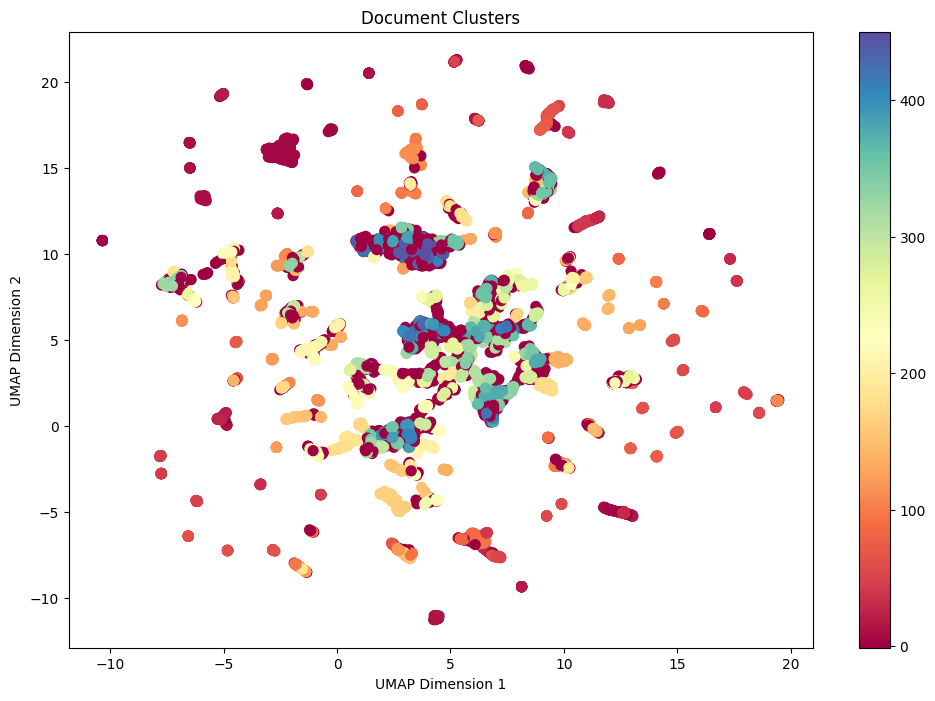

In [107]:
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, s=50, cmap='Spectral')
plt.title('Document Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar()
plt.show()


In [113]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming 'umap_embeddings' are your reduced embeddings and 'cluster_labels' from HDBSCAN
for cluster_num in set(cluster_labels):
    cluster_points = umap_embeddings[cluster_labels == cluster_num]
    centroid = np.mean(cluster_points, axis=0)
    distances = euclidean_distances(cluster_points, [centroid])
    top_idx = np.argmin(distances)
    top_document = documents[np.where(cluster_labels == cluster_num)[0][top_idx]]
    print(f"Top document for Cluster {cluster_num}: {top_document[:10]}")



Top document for Cluster 0:      WASHI
Top document for Cluster 1: A federal 
Top document for Cluster 2:   A pastor
Top document for Cluster 3:   WASHINGT
Top document for Cluster 4:   WASHINGT
Top document for Cluster 5: A federal 
Top document for Cluster 6:   WASHINGT
Top document for Cluster 7:    WASHING
Top document for Cluster 8: A chief en
Top document for Cluster 9:   WASHINGT
Top document for Cluster 10: Today, Ric
Top document for Cluster 11:  A federal
Top document for Cluster 12: A Texas ma
Top document for Cluster 13:   WASHINGT
Top document for Cluster 14: 
The Justi
Top document for Cluster 15:       The 
Top document for Cluster 16:       WASH
Top document for Cluster 17:   GREENBEL
Top document for Cluster 18:   The pres
Top document for Cluster 19:   WASHINGT
Top document for Cluster 20:   WASHINGT
Top document for Cluster 21: A second s
Top document for Cluster 22:   Three Po
Top document for Cluster 23: The Justic
Top document for Cluster 24:   WASHINGT
Top docume